In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [1]:
#reading data from text file
#data are points in 2D plane
f=open("linear", "r")
text=f.read().split()
x=[]
y=[]
for i in range(1, 22):
    x.append(float(text[2*i]))
    y.append(float(text[2*i+1]))
print(x, y)

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [-0.01701, 0.19027, -0.0667, 0.34759, -0.00457, 0.0169, 0.5054, 1.25068, 1.51939, 1.17812, 1.67118, 2.1463, 1.60588, 2.54108, 1.97292, 2.38741, 2.91471, 3.12256, 3.16602, 2.86379, 3.29251]


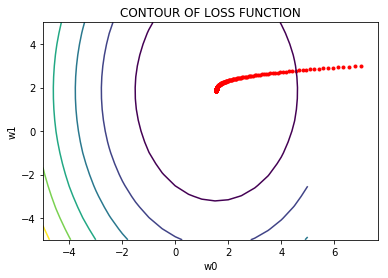

m= 1.8531734858597237 , c= 1.5525919047619072 821


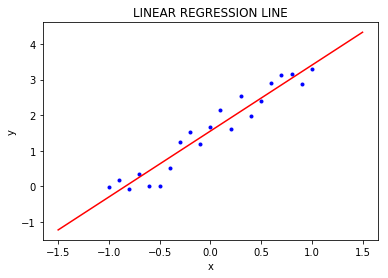

In [3]:
#loss function, which is to be minimized using gradient descent
#here loss function is only used for contour plotting
#NOTE: loss function is a standard loss function which is the
#sum of individual losses(deviations from the original point)
#over the whole dataset
def loss_function(x, y, n):
    w0=np.linspace(-5, 5, n)
    w1=np.linspace(-5, 5, n)
    W0, W1 = np.meshgrid(w0, w1)
    z=[]
    for k in range(n):
        s=0
        for i in range(n):
            s=s+(((W1[k]*x[i])+W0[k]-y[i])**2)
        z.append(s)
    z=np.array(z)
    return w0, w1, z
#differentiation of loss function, this is helpful in gradient descent
def diff_loss_func(w0, w1, n, x, y):
    s0=0
    s1=0
    for i in range(n):
        s0+=(2*((w1*x[i])+w0-y[i]))
        s1+=(2*((w1*x[i])+w0-y[i])*x[i])
    return s0, s1
#contour plotter, for plotting countour of loss function
def contour_plotter():
    w0, w1, z=loss_function(x, y, n)
    plt.contour(w0, w1, z)
    plt.title("CONTOUR OF LOSS FUNCTION")
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.scatter(w0_list, w1_list, color='red', marker='.')
    plt.show()
#plotting the final line obtained through regression
#line size is adjusted to cover the whole dataset
def final_result_plotter():
    plt.scatter(x, y, color='blue', marker='.')
    x_plot=np.linspace(-1.5, 1.5, 100)
    y_plot=(w1*x_plot)+w0
    plt.plot(x_plot, y_plot, 'r-')
    plt.title("LINEAR REGRESSION LINE")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
#gradient descent algorithm
def gradient_descent(w0, w1, alpha, n, x, y):
    w0_track, w1_track=0, 0
    itr=0
    while(w0_track != w0 and w1_track != w1):
        w0_track, w1_track=w0, w1
        w0_list.append(w0)
        w1_list.append(w1)
        diff_wrt_w0, diff_wrt_w1=diff_loss_func(w0, w1, n, x, y)
        w0, w1 =w0-(alpha*(diff_wrt_w0)), w1-(alpha*(diff_wrt_w1))
        itr+=1
    return w0, w1, itr
#calling functions with required arguments
#also setting alpha to be 0.001 optimal for linear regression
n=len(x)
alpha=0.001
w0_initial=7
w1_initial=3
w0_list=[]
w1_list=[]
w0, w1, itr=gradient_descent(w0_initial, w1_initial, alpha, n, x, y)
contour_plotter()
plt.show()
print("m=", w1, ", c=", w0, itr)
final_result_plotter()

